# **Imorting Necessary Libraries**

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob

# **Difining the Paths for Data**

In [2]:
path = '/kaggle/input/age-recognition-dataset/Dataset/'

# **Visualizing the Data**

In [3]:
images_6_20 = glob.glob(path + "6-20/*")
images_25_30 = glob.glob(path + "25-30/*")
images_42_48 = glob.glob(path + "42-48/*")
images_60_98 = glob.glob(path + "60-98/*")

In [4]:
print(len(images_6_20))
print(len(images_25_30))
print(len(images_42_48))
print(len(images_60_98))

2514
2495
1439
2649


In [5]:
data = pd.DataFrame(np.concatenate([["6-20"] * len(images_6_20), ['25-30'] *  len(images_25_30), ['42-48'] * len(images_42_48), ['60-98'] * len(images_60_98)]), columns = ["age class"])

<AxesSubplot:xlabel='age class', ylabel='count'>

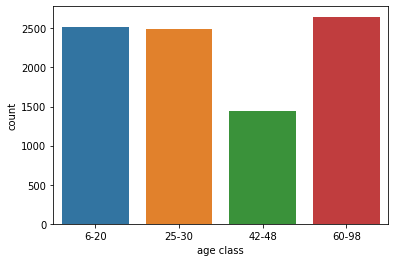

In [6]:
sns.countplot(x = 'age class', data = data)

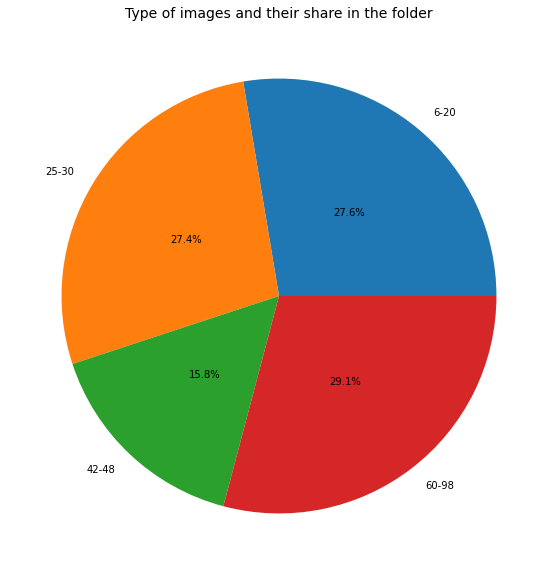

In [7]:
plt.figure(figsize = (15, 10))
plt.pie(x = np.array([len(images_6_20), len(images_25_30), len(images_42_48), len(images_60_98)]), autopct = "%.1f%%", explode = [0, 0, 0, 0], labels = ["6-20", "25-30", "42-48", "60-98"], pctdistance = 0.5)
plt.title("Type of images and their share in the folder", fontsize = 14);

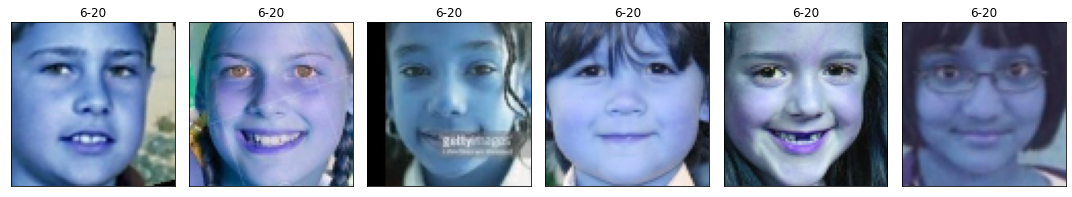

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_6_20[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("6-20")
fig.tight_layout()    

plt.show()

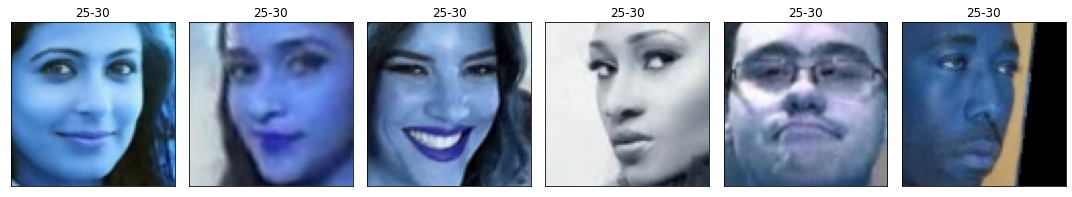

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_25_30[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("25-30")
fig.tight_layout()    

plt.show()

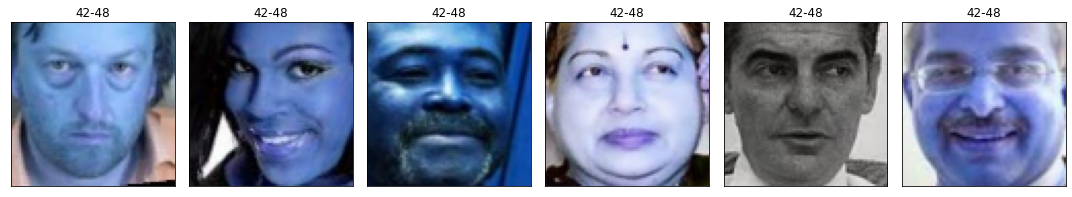

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_42_48[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("42-48")
fig.tight_layout()    

plt.show()

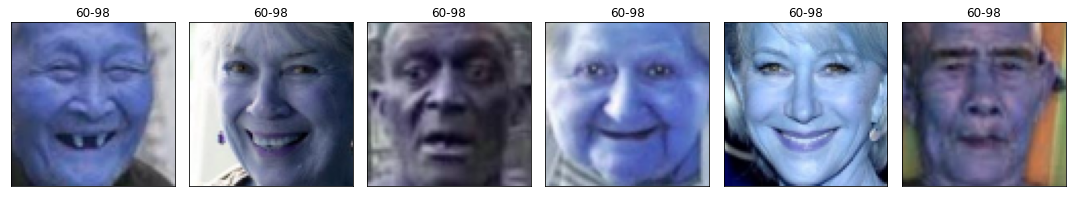

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(images_60_98[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("60-98")
fig.tight_layout()    

plt.show()

# **Data Processing**

In [12]:
subdir = ['6-20', '25-30', '42-48', '60-98']

target_name = {'6-20': 0, '25-30': 1, '42-48': 2, '60-98': 3}
X, y = [], []
for age in subdir:
    for img_name in os.listdir(path + age):
        img = cv2.imread(path + age + '/' + img_name)
        scalled_raw_img = cv2.resize(img, (80, 80)) / 255.0
        X.append(scalled_raw_img)
        y.append(target_name[age])

In [13]:
len(X), len(y)

(9097, 9097)

In [14]:
X, y = np.array(X), np.array(y)
X.shape, y.shape

((9097, 80, 80, 3), (9097,))

In [15]:
y = tf.keras.utils.to_categorical(y, num_classes = 4)
y.shape

(9097, 4)

In [16]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((7277, 80, 80, 3), (1820, 80, 80, 3), (7277, 4), (1820, 4))

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5457, 80, 80, 3), (1820, 80, 80, 3), (5457, 4), (1820, 4))

# **Defining the Model**

In [18]:
input_shape = (80, 80, 3)

base_model = tf.keras.applications.ResNet50V2(
    weights = 'imagenet',
    input_shape = input_shape,
    classes = 4,
    classifier_activation = "softmax",
    include_top = False
)

for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 3, 3, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 23,827,588
Trainable params: 262,788
Non-trainable params: 23,564,800
_________________________________________________________________


In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 4)

history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 256,
    epochs = 10,
    validation_data = (X_val, y_val),
    callbacks = callback)

Epoch 1/10
22/22 [==============================] - 78s 3s/step - loss: 2.4770 - accuracy: 0.3897 - val_loss: 1.0996 - val_accuracy: 0.5027
Epoch 2/10
22/22 [==============================] - 72s 3s/step - loss: 1.0440 - accuracy: 0.5443 - val_loss: 1.0127 - val_accuracy: 0.5610
Epoch 3/10
22/22 [==============================] - 73s 3s/step - loss: 0.9408 - accuracy: 0.6040 - val_loss: 0.9801 - val_accuracy: 0.5758
Epoch 4/10
22/22 [==============================] - 74s 3s/step - loss: 0.8825 - accuracy: 0.6363 - val_loss: 0.9580 - val_accuracy: 0.5989
Epoch 5/10
22/22 [==============================] - 73s 3s/step - loss: 0.8355 - accuracy: 0.6468 - val_loss: 0.9411 - val_accuracy: 0.6033
Epoch 6/10
22/22 [==============================] - 73s 3s/step - loss: 0.8072 - accuracy: 0.6686 - val_loss: 0.9456 - val_accuracy: 0.5984
Epoch 7/10
22/22 [==============================] - 73s 3s/step - loss: 0.7675 - accuracy: 0.6973 - val_loss: 0.9295 - val_accuracy: 0.6126
Epoch 8/10
22/22 [==

# **Model Metrics**

In [21]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

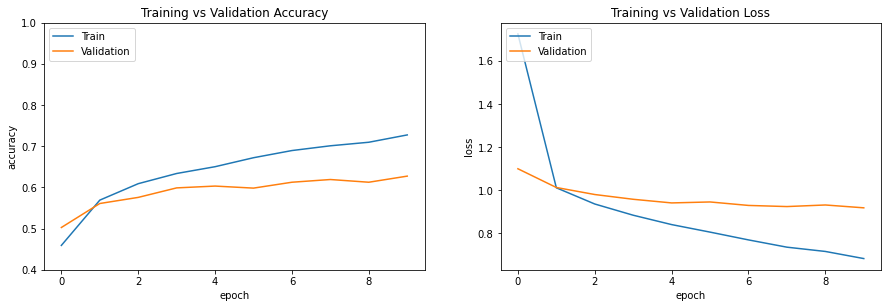

In [22]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.ylim(0.4, 1)
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(2, 2, 2)
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.title("Training vs Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

# **Predictions**

In [23]:
y_pred = np.argmax(model.predict(X_test, batch_size = 1), axis = 1) 

In [24]:
y_true = [np.argmax(y, axis = None, out = None) for y in y_test]

# **Confusion Matrix**

In [25]:
cm = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

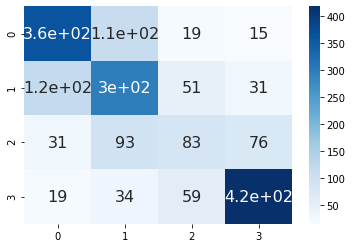

In [26]:
sns.heatmap(cm, annot = True, cmap = "Blues", annot_kws = {"size": 16})

Text(69.0, 0.5, 'Predicted')

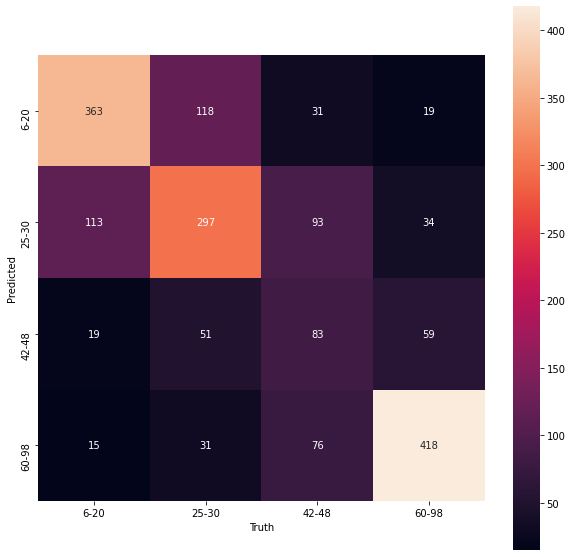

In [27]:
plt.figure(figsize = (10,10))
_ = sns.heatmap(cm.T, annot = True, fmt = 'd', cbar = True, square = True, xticklabels = target_name.keys(),
             yticklabels = target_name.keys())
plt.xlabel('Truth')
plt.ylabel('Predicted')

# **Classification Report**

In [28]:
print('Classification Report')
print(classification_report(y_true, y_pred, target_names = target_name.keys()))

Classification Report
              precision    recall  f1-score   support

        6-20       0.68      0.71      0.70       510
       25-30       0.55      0.60      0.57       497
       42-48       0.39      0.29      0.34       283
       60-98       0.77      0.79      0.78       530

    accuracy                           0.64      1820
   macro avg       0.60      0.60      0.60      1820
weighted avg       0.63      0.64      0.63      1820



# **Analysing the Results**

In [29]:
confusion = []

for i, j in zip(y_true, y_pred):
  if i == 3 and j == 0:
    confusion.append('Yes')
  else:
    confusion.append('No')

In [30]:
confusion

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No'

In [31]:
confusion_table = pd.DataFrame(data = confusion, columns = ["Looks Young"])
confusion_table

,Looks Young
0,No
1,No
2,No
3,No
4,No
...,...
1815,No
1816,No
1817,No
1818,No


In [32]:
confusion_table = pd.DataFrame({'Predicton':y_pred,
                                'Truth': y_true,
                                'Looks Young': confusion})
confusion_table

,Predicton,Truth,Looks Young
0,3,2,No
1,1,1,No
2,1,2,No
3,1,1,No
4,3,3,No
...,...,...,...
1815,0,0,No
1816,3,3,No
1817,0,0,No
1818,3,3,No


In [33]:
confusion_table['Looks Young'] == 'Yes'

0       False
1       False
2       False
3       False
4       False
        ...  
1815    False
1816    False
1817    False
1818    False
1819    False
Name: Looks Young, Length: 1820, dtype: bool

In [34]:
Looks_Young = confusion_table[confusion_table['Looks Young'] == 'Yes']
Looks_Young

,Predicton,Truth,Looks Young
47,0,3,Yes
178,0,3,Yes
180,0,3,Yes
246,0,3,Yes
421,0,3,Yes
559,0,3,Yes
592,0,3,Yes
634,0,3,Yes
665,0,3,Yes
733,0,3,Yes


In [35]:
Looks_Young.index

Int64Index([  47,  178,  180,  246,  421,  559,  592,  634,  665,  733,  795,
             934,  944,  992, 1094, 1212, 1313, 1524, 1603],
           dtype='int64')

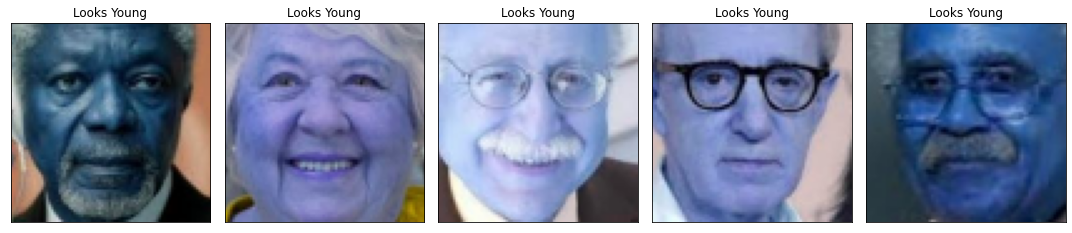

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in zip([47, 178, 180, 246, 421], axes.flat):
    img = cv2.imread(images_60_98[i])
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title("Looks Young")
fig.tight_layout()    

plt.show()